In [ ]:
from datetime import datetime

now = datetime.now()
today = now.strftime("%Y-%m-%d")
today

'2025-06-11'

1. manse_tool_agent
2. retriever_tool_agent
3. 일반 답변에 대한 web search

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Enhanced Retriever 및 Chain (Query Expansion 포함)

In [4]:
# 기존 Retriever 및 Chain (원래대로 복원)
from pdf_retriever_saju import pdf_rag_chain, compression_retriever

pdf_retriever = compression_retriever()
pdf_chain = pdf_rag_chain()

In [5]:
# Manse_tool

In [6]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from manse_tool import calculate_saju_tool

# Agent 생성 시 tools 리스트에 추가

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
tools = [calculate_saju_tool]  # 사주 툴 추가

manse_tool_agent = create_react_agent(llm, tools)

In [7]:
response = manse_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자, 대전출생")]})

In [8]:
print(response["messages"][-1].content)

1995년 3월 28일 대전에서 태어난 남성의 사주팔자를 분석해보면 다음과 같습니다.

년주는 을해, 월주는 기묘, 일주는 무오, 시주는 무오입니다. 일간은 무(土)입니다.

오행의 강약을 보면 토(土)가 가장 강하고, 그 다음으로 목(木), 화(火), 수(水)가 있으며 금(金)은 약한 편입니다.

십신 분석에서는 년주에 정관과 편재, 편관이 혼재되어 있고, 월주에는 겁재와 정관, 일주와 시주에는 정인과 겁재가 주로 나타납니다.

대운은 5세부터 무인, 15세부터 정축, 25세부터 병자, 35세부터 을해 대운이 순차적으로 들어옵니다.

이 사주는 토의 기운이 강해 안정적이고 현실적인 성향이 강하며, 목과 화의 기운이 있어 성장과 발전, 활동적인 면도 갖추고 있습니다. 금의 기운이 약해 의사소통이나 결단력에서 보완이 필요할 수 있습니다.

더 구체적인 운세나 성격, 직업 적성 등 궁금한 점이 있으면 알려주세요.


In [9]:
from langchain_core.tools.retriever import create_retriever_tool
from langchain_core.prompts import PromptTemplate


# PDF 문서를 기반으로 검색 도구 생성
retriever_tool = create_retriever_tool(
    pdf_retriever,
    "pdf_retriever",
    "A tool for searching information related to Saju (Four Pillars of Destiny)",
    document_prompt=PromptTemplate.from_template(
        "<document><context>{page_content}</context><metadata><source>{source}</source><page>{page}</page></metadata></document>"
    ),
)


In [10]:
retriever_tools = [retriever_tool]

In [11]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from langchain_core.prompts import load_prompt, ChatPromptTemplate, MessagesPlaceholder

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

retriever_tool_agent = create_react_agent(llm, retriever_tools)

base_prompt = load_prompt("prompt/saju-rag-promt_2.yaml")
saju_prompt = ChatPromptTemplate.from_messages([
    ("system", base_prompt.template),
    MessagesPlaceholder("messages"),
])
retriever_tool_agent = create_react_agent(llm, retriever_tools, prompt=saju_prompt) 

In [12]:
response = retriever_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자의 사주 알려줘")]})

In [13]:
print(response["messages"][-1].content)

안녕하세요. 1995년 3월 28일 남자분의 사주를 분석해드리겠습니다.  
우선, 사주 분석을 위해 다음 절차를 따르겠습니다.

---

## 1. 사주(천간지지) 변환

- 출생일: 1995년 3월 28일 (양력 기준)
- 성별: 남자
- 출생시간: 미지정 (시간을 알려주시면 정확한 시주(時柱)까지 계산 가능합니다)

### 1) 연주(년주)  
1995년은 을해(乙亥)년입니다.  
- 을(乙): 목(木)  
- 해(亥): 수(水)

### 2) 월주(월주)  
3월은 음력으로 2월 또는 3월에 해당할 수 있으나, 양력 3월 28일은 음력 2월 28일경입니다.  
1995년 음력 2월은 을묘(乙卯)월입니다.  
- 을(乙): 목(木)  
- 묘(卯): 목(木)

### 3) 일주(일주)  
1995년 3월 28일의 일간(日干)은 정화(丁火)입니다.  
정화(丁)는 불(火)입니다.  
일지는 축(丑)일일 가능성이 높으나, 정확한 일지는 음력 달력과 천간지지 계산이 필요합니다.  
(참고로 1995년 3월 28일은 정축(丁丑)일입니다.)  
- 정(丁): 화(火)  
- 축(丑): 토(土)

### 4) 시주(시간)  
출생 시간을 알려주시면 시주를 정확히 계산해 드립니다.  
예) 자시(23:00~01:00), 축시(01:00~03:00), 인시(03:00~05:00), 묘시(05:00~07:00), 진시(07:00~09:00), 사시(09:00~11:00), 오시(11:00~13:00), 미시(13:00~15:00), 신시(15:00~17:00), 유시(17:00~19:00), 술시(19:00~21:00), 해시(21:00~23:00)

---

## 2. 사주 구조 (예시: 시주 미지정 상태)

| 구분 | 천간 | 지지 | 오행 |
|-------|-------|-------|-------|
| 연주 | 乙    | 亥    | 목, 수 |
| 월주 | 乙    | 卯    | 목, 목 |
| 일주 | 丁    | 丑    | 화, 토 |
| 시주 | ?

In [14]:
# Query Expansion Agent (manse_tool처럼 간단하게)
from query_expansion_agent import get_query_expansion_agent

query_expansion_agent = get_query_expansion_agent()


In [15]:
# Query Expansion Agent 올바른 사용법 테스트
response = query_expansion_agent.invoke({"messages": [("user", "1995년 3월 28일 남자 사주")]})
print(response["messages"][-1].content)


확장된 영어 질문은 다음과 같습니다:

"Could you provide a detailed birth chart analysis for a male born on March 28, 1995, focusing on the Four Pillars of Destiny (Ba Zi)? I am particularly interested in understanding the implications of his elemental balance, the influence of his Heavenly Stems and Earthly Branches, and any significant life patterns or trends that may emerge from his Ba Zi chart. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny."

이 질문을 사용하여 문서 검색을 진행하세요. 추가적인 도움이 필요하시면 말씀해 주세요!


In [16]:
from langchain_community.utilities.duckduckgo_search import DuckDuckGoSearchAPIWrapper

In [1]:
from query_expansion_agent import get_query_expansion_node

query_expansion_node = get_query_expansion_node()

# 노드 테스트
test_state = {"messages": [("user", "정관이 뭐야?")]}
result = query_expansion_node(test_state)

print("노드 테스트 결과:")
print(f"원본 질문: {result.get('original_query')}")
print(f"확장된 질문: {result.get('expanded_query')}")
print(f"확장 결과: {result.get('expansion_result')}")


노드 테스트 결과:
원본 질문: ('user', '정관이 뭐야?')
확장된 질문: What is the concept of "Zheng Guan" in the context of Four Pillars of Destiny (Ba Zi) analysis, and how does it influence one's personality and life path according to their birth chart?
확장 결과: 
[Query Expansion 결과]
원본 질문: ('user', '정관이 뭐야?')
확장된 영어 질문: What is the concept of "Zheng Guan" in the context of Four Pillars of Destiny (Ba Zi) analysis, and how does it influence one's personality and life path according to their birth chart?

검색을 위해 확장된 쿼리를 사용합니다.



In [18]:
from query_expansion_agent import get_query_expansion_node

query_expansion_node = get_query_expansion_node()

# 노드 테스트
test_state = {"messages": [("user", "1995년 3월 28일 남자 사주")]}
result = query_expansion_node(test_state)

print("노드 테스트 결과:")
print(f"원본 질문: {result.get('original_query')}")
print(f"확장된 질문: {result.get('expanded_query')}")
print(f"확장 결과: {result.get('expansion_result')}")

노드 테스트 결과:
원본 질문: ('user', '1995년 3월 28일 남자 사주')
확장된 질문: Could you provide a detailed analysis of the Four Pillars of Destiny (Ba Zi) for a male born on March 28, 1995? I am interested in understanding how his birth chart influences his personality, career prospects, and overall life path. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny.
확장 결과: 
[Query Expansion 결과]
원본 질문: ('user', '1995년 3월 28일 남자 사주')
확장된 영어 질문: Could you provide a detailed analysis of the Four Pillars of Destiny (Ba Zi) for a male born on March 28, 1995? I am interested in understanding how his birth chart influences his personality, career prospects, and overall life path. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny.

검색을 위해 확장된 쿼리를 사용합니다.



In [19]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [20]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [21]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults
from langchain_core.documents import Document

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
    
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [22]:
# web_tool = [tavily_tool]
web_tool = [tavily_tool, duck_tool]

In [23]:
prompt = """
사주 또는 사주 오행의 개념적 질문이나, 일상 질문이 들어오면, web search를 통해 답합니다.
"""
web_tool_agent = create_react_agent(llm, tools=web_tool, prompt=prompt)

In [24]:
response = web_tool_agent.invoke({"messages": [("user", "사주오행에 대해서 설명해줘")]})

In [25]:
response

{'messages': [HumanMessage(content='사주오행에 대해서 설명해줘', additional_kwargs={}, response_metadata={}, id='a08ee5ed-a311-47db-9a74-92990d5f1f60'),
  AIMessage(content="사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. '사주'는 태어난 연, 월, 일, 시의 네 기둥(四柱)을 의미하며, 각각 천간(하늘의 기운)과 지지(땅의 기운)로 구성되어 있습니다. 이 네 기둥이 모여 한 사람의 운명을 나타낸다고 봅니다.\n\n'오행'은 우주 만물을 구성하는 다섯 가지 기본 원소인 목(木), 화(火), 토(土), 금(金), 수(水)를 말합니다. 이 다섯 가지 원소는 서로 상생(서로 돕는 관계)과 상극(서로 제약하는 관계)을 통해 자연과 인간의 변화를 설명합니다.\n\n사주오행에서는 태어난 시점의 천간과 지지에 포함된 오행의 조합을 분석하여, 그 사람의 성격, 건강, 직업, 인간관계, 운세 등을 예측합니다. 예를 들어, 목이 강한 사람은 성장과 발전을 상징하며, 화가 강하면 열정과 에너지가 넘치는 성격으로 해석할 수 있습니다.\n\n요약하자면,\n- 사주: 태어난 연, 월, 일, 시의 네 기둥\n- 오행: 목, 화, 토, 금, 수의 다섯 원소\n- 사주오행: 사주의 네 기둥에 포함된 오행을 분석하여 개인의 운명과 성격을 해석하는 체계\n\n더 구체적인 내용이나 궁금한 점이 있으면 알려주세요!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 371, 'prompt_tokens': 181, 'total_tokens': 552, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reas

In [26]:
print(response["messages"][-1].content)

사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. '사주'는 태어난 연, 월, 일, 시의 네 기둥(四柱)을 의미하며, 각각 천간(하늘의 기운)과 지지(땅의 기운)로 구성되어 있습니다. 이 네 기둥이 모여 한 사람의 운명을 나타낸다고 봅니다.

'오행'은 우주 만물을 구성하는 다섯 가지 기본 원소인 목(木), 화(火), 토(土), 금(金), 수(水)를 말합니다. 이 다섯 가지 원소는 서로 상생(서로 돕는 관계)과 상극(서로 제약하는 관계)을 통해 자연과 인간의 변화를 설명합니다.

사주오행에서는 태어난 시점의 천간과 지지에 포함된 오행의 조합을 분석하여, 그 사람의 성격, 건강, 직업, 인간관계, 운세 등을 예측합니다. 예를 들어, 목이 강한 사람은 성장과 발전을 상징하며, 화가 강하면 열정과 에너지가 넘치는 성격으로 해석할 수 있습니다.

요약하자면,
- 사주: 태어난 연, 월, 일, 시의 네 기둥
- 오행: 목, 화, 토, 금, 수의 다섯 원소
- 사주오행: 사주의 네 기둥에 포함된 오행을 분석하여 개인의 운명과 성격을 해석하는 체계

더 구체적인 내용이나 궁금한 점이 있으면 알려주세요!


In [29]:
# GeneralQA Tool
from langchain.tools import  tool
from langchain_google_genai import ChatGoogleGenerativeAI
google_llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

@tool
def general_qa_tool(query: str) -> str:
    """
    일반적인 질문이나 상식적인 내용에 대해 답변합니다. 사주와 관련 없는 모든 질문에 사용할 수 있습니다.
    """
    google_llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    return google_llm.invoke(query)

In [30]:
from langgraph.prebuilt import create_react_agent

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
general_qa_tools = [general_qa_tool]

prompt = "일반적인 질문이나 상식적인 내용에 대해 답변합니다."

general_qa_agent = create_react_agent(llm, tools=general_qa_tools, prompt=prompt)

# Agent node 생성

In [31]:
from langchain_core.messages import HumanMessage

# 지정한 agent와 name을 사용하여 agent 노드를 생성
def agent_node(state, agent, name):
    # agent 호출
    agent_response = agent.invoke(state)
    # agent의 마지막 메시지를 HumanMessage로 변환하여 반환
    return {
        "messages": [
            HumanMessage(content=agent_response["messages"][-1].content, name=name)
        ]
    }

# node 생성

In [32]:
import functools

manse_tool_agent_node = functools.partial(agent_node, agent=manse_tool_agent, name="ManseTool")
retriever_tool_agent_node = functools.partial(agent_node, agent=retriever_tool_agent, name="RetrieverTool")
web_tool_agent_node = functools.partial(agent_node, agent=web_tool_agent, name="WebTool")
general_qa_agent_node = functools.partial(agent_node, agent=general_qa_agent, name="GeneralQA")

# 노드 실험

In [33]:
manse_message = manse_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자")
        ]
    }
)
print(manse_message)

{'messages': [HumanMessage(content='1995년 3월 28일 남자분의 사주팔자를 분석해보면 다음과 같습니다.\n\n- 년주: 을해\n- 월주: 기묘\n- 일주: 무오\n- 시주: 무오\n- 일간: 무\n\n오행의 강약은 토가 가장 강하고, 그 다음으로 목, 화, 수 순이며 금은 부족한 상태입니다.\n\n십신 분석에서는 년주에 정관과 편재, 편관이 혼재되어 있고, 월주에는 겁재와 정관이, 일주와 시주에는 정인과 겁재가 혼재되어 있습니다.\n\n대운은 5세부터 무인, 15세부터 정축, 25세부터 병자, 35세부터 을해 대운이 순차적으로 진행됩니다.\n\n이 사주는 토의 기운이 강하고 금의 기운이 부족하여 금의 기운을 보완하는 것이 좋습니다. 또한 정관과 편재, 겁재가 혼재되어 있어 대인관계나 재물운에 영향을 미칠 수 있습니다. 대운의 흐름에 따라 인생의 중요한 시기를 잘 활용하는 것이 중요합니다.', additional_kwargs={}, response_metadata={}, name='ManseTool')]}


In [34]:
retriever_message =  retriever_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자 12시 30분")
        ]
    }
)
print(retriever_message)

{'messages': [HumanMessage(content='안녕하세요. 1995년 3월 28일 남자 12시 30분 출생 사주 분석을 진행하겠습니다.\n\n---\n\n### 1. 출생 정보 및 천간지지 변환\n\n- 출생일: 1995년 3월 28일 (양력 기준)\n- 성별: 남자\n- 출생시간: 12시 30분 → 지지 시간으로는 午시 (11:30~13:30)\n\n---\n\n#### 1) 연월일시 천간지지 변환\n\n- 연도(1995년): 을해년 (乙亥年)\n- 월(3월): 음력 2월 또는 3월에 따라 다르나, 1995년 3월 28일은 양력 기준으로 을묘월 (乙卯月)\n- 일(28일): 병진일 (丙辰日)\n- 시(12시 30분): 午시 (午時)\n\n따라서 사주는 다음과 같습니다.\n\n| 구분 | 천간 | 지지 |\n|------|------|------|\n| 연   | 乙   | 亥   |\n| 월   | 乙   | 卯   |\n| 일   | 丙   | 辰   |\n| 시   | 丙   | 午   |\n\n---\n\n### 2. 오행(五行) 분석\n\n#### 1) 천간지지 → 오행 매핑 표\n\n| 오행 | 해당 천간/지지 |\n|-------|----------------|\n| 목(木) | 甲, 乙, 寅, 卯 |\n| 화(火) | 丙, 丁, 巳, 午 |\n| 토(土) | 戊, 己, 辰, 戌, 丑, 未 |\n| 금(金) | 庚, 辛, 申, 酉 |\n| 수(水) | 壬, 癸, 子, 亥 |\n\n---\n\n#### 2) 8자 천간지지 오행 점수 계산\n\n| 위치 | 천간/지지 | 오행 | 점수 |\n|-------|-----------|-------|-------|\n| 연간  | 乙        | 목    | 1     |\n| 연지  | 亥        | 수    | 1     |\n| 월간  | 乙        | 목    | 1     |\n| 월지  | 卯        | 목    | 1     |\n| 일간  | 丙       

In [35]:
web_message = web_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="사주오행에서의 불")
        ]
    }
)
print(web_message)


{'messages': [HumanMessage(content="사주오행에서 '불(火)'은 다섯 가지 기본 요소 중 하나로, '화(火)'라고도 합니다. 불은 사주에서 다음과 같은 의미와 특성을 가집니다.\n\n1. 기본 의미:\n- 불은 열정, 에너지, 활력, 빛, 따뜻함을 상징합니다.\n- 생명력과 성장, 변화와 발전을 나타내며, 강한 의지와 추진력을 의미합니다.\n\n2. 성격적 특성:\n- 불의 기운을 가진 사람은 대체로 열정적이고 적극적이며, 리더십이 강하고 활발한 성격을 가집니다.\n- 감정 표현이 직설적이고 솔직하며, 때로는 다소 급하고 성급할 수 있습니다.\n\n3. 계절과 방향:\n- 불은 여름과 관련이 깊으며, 남쪽 방향을 상징합니다.\n- 여름의 뜨거운 태양처럼 밝고 강렬한 에너지를 지닙니다.\n\n4. 오행 상생과 상극:\n- 불은 나무(木)를 태워 불을 키우므로 나무와 상생(목생화) 관계입니다.\n- 불은 물(水)과 상극 관계로, 물은 불을 끄는 역할을 합니다.\n\n5. 사주에서의 역할:\n- 불의 위치와 세력에 따라 개인의 성격, 건강, 운세에 영향을 미칩니다.\n- 불이 강하면 활발하고 열정적이지만, 과하면 성급하거나 화를 잘 내는 성향이 나타날 수 있습니다.\n\n필요하면 사주에서 불의 구체적인 역할이나 불이 강하거나 약할 때의 해석에 대해 더 자세히 설명해 드릴 수 있습니다.", additional_kwargs={}, response_metadata={}, name='WebTool')]}


In [36]:
# GeneralQA 테스트
general_qa_message = general_qa_agent_node(
    {
        "messages": [
            HumanMessage(content="파이썬에서 리스트와 튜플의 차이점?")
        ]
    }
)
print(general_qa_message)

{'messages': [HumanMessage(content="파이썬에서 리스트와 튜플은 모두 여러 개의 항목을 담을 수 있는 자료구조이지만, 몇 가지 중요한 차이점이 있습니다.\n\n### 1. 가변성 (Mutability)\n- **리스트 (List)**: 가변적(mutable)입니다. 즉, 리스트를 생성한 후에도 요소를 추가, 삭제, 변경할 수 있습니다.\n- **튜플 (Tuple)**: 불변적(immutable)입니다. 튜플을 생성한 후에는 요소를 변경할 수 없습니다.\n\n### 2. 문법\n- **리스트**: 대괄호 `[]`를 사용하여 정의합니다. 예: `my_list = [1, 2, 3]`\n- **튜플**: 소괄호 `()`를 사용하여 정의합니다. 예: `my_tuple = (1, 2, 3)` (단, 요소가 하나인 튜플은 `(1,)`처럼 쉼표를 붙여야 합니다.)\n\n### 3. 성능\n- **튜플**: 불변성이 보장되므로 리스트보다 더 빠르고 메모리 효율적입니다.\n- **리스트**: 가변적이므로 튜플보다 약간 더 많은 메모리를 사용하고, 요소 변경 시 약간의 오버헤드가 발생할 수 있습니다.\n\n### 4. 사용 사례\n- **리스트**: 데이터가 변경될 수 있는 경우에 사용합니다. 예: 사용자 목록, 장바구니 등.\n- **튜플**: 데이터가 변경되지 않아야 하는 경우에 사용합니다. 예: 좌표 (x, y), RGB 색상 등.\n\n### 5. 제공하는 메서드\n- **리스트**: `append()`, `insert()`, `remove()`, `pop()`, `sort()` 등 다양한 메서드를 제공합니다.\n- **튜플**: `count()`, `index()`와 같이 요소를 조회하는 메서드만 제공합니다.\n\n### 요약\n\n| 특징        | 리스트 (List) | 튜플 (Tuple) |\n| ----------- | ------------- | ------------- |\n| 가변성      | 가변적 (Mutable) | 불

# Agent Supervisor 생성

In [50]:
from pydantic import BaseModel
from typing import Literal

# 멤버 Agent 목록 정의 (QueryExpansion, GeneralQA 추가)
members = ["ManseTool", "RetrieverTool", "WebTool", "GeneralQA"]

# 다음 작업자 선택 옵션 목록 정의
options_for_next = ["FINISH"] + members

# 작업자 선택 응답 모델 정의: 다음 작업자를 선택하거나 작업 완료를 나타냄
class RouteResponse(BaseModel):
    next: Literal[*options_for_next]


In [51]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI


# 시스템 프롬프트 정의: 작업자 간의 대화를 관리하는 감독자 역할
system_prompt = (
    "You are a supervisor tasked with orchestrating a multi-step workflow with the following specialized agents: {members}.\n"
    "The tools are:\n"
    "- ManseTool: For extracting and calculating Saju information (year, month, day, hour pillars) from user input (such as date/time of birth).\n"
    "- RetrieverTool: For interpreting Saju details and providing in-depth Saju or Four Pillars explanations and analysis based on calculated information.\n"
    "- WebTool: For answering general or conceptual questions about Saju, or handling everyday/non-specialized queries, by searching the web.\n"
    "- GeneralQA: For answering general questions that are NOT related to Saju at all (e.g., programming, science, general knowledge, weather, etc.).\n\n"

    "Your job is to:\n"
    "1. Route the user's request to the most appropriate tool:\n"
    "   - If the user input contains raw birth information (date/time, etc.), ALWAYS call ManseTool FIRST.\n"
    "   - IMPORTANT: **After using ManseTool, you MUST ALWAYS call RetrieverTool next to interpret the calculated Saju results, before finishing or moving to any other step. Do NOT skip this step.**\n"
    "   - If the input is purely a general, conceptual, or non-specialized Saju question, and does NOT require document search, call WebTool.\n"
    "   - If the input is completely unrelated to Saju, call GeneralQA.\n"
    "2. NEVER finish the workflow after ManseTool alone. Always pass the result to RetrieverTool before considering FINISH.\n"
    "3. For completely non-Saju questions, use GeneralQA directly.\n"
    "3. After all needed steps are complete, respond with FINISH.\n"
    "You MUST always decide the most logical next agent for the task and strictly follow this tool sequence."
)


# ChatPromptTemplate 생성
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options_for_next), members=", ".join(members))


# LLM 초기화
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)


# Supervisor Agent 생성
def supervisor_agent(state):
    # 프롬프트와 LLM을 결합하여 체인 구성
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
    # Agent 호출
    return supervisor_chain.invoke(state)

In [52]:
import operator
from typing import Sequence, Annotated
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage


# 상태 정의
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]  # 메시지
    next: str  # 다음으로 라우팅할 에이전트

In [53]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# Query Expansion 노드가 포함된 그래프 생성
workflow = StateGraph(AgentState)

# 그래프에 노드 추가: members = ["ManseTool", "QueryExpansion", "RetrieverTool", "WebTool", "GeneralQA"]
workflow.add_node("ManseTool", manse_tool_agent_node)
workflow.add_node("QueryExpansion", query_expansion_node)  # Query Expansion 노드 추가
workflow.add_node("RetrieverTool", retriever_tool_agent_node)  # 기존 Retriever 사용
workflow.add_node("WebTool", web_tool_agent_node)
workflow.add_node("GeneralQA", general_qa_agent_node)  # GeneralQA 노드 추가
workflow.add_node("Supervisor", supervisor_agent)



# 멤버 노드 > Supervisor 노드로 엣지 추가
for member in members:
    workflow.add_edge(member, "Supervisor")

# 조건부 엣지 추가
conditional_map = {k: k for k in members}
conditional_map["FINISH"] = END

def get_next(state):
    return state["next"]

# Supervisor 노드에서 조건부 엣지 추가
workflow.add_conditional_edges("Supervisor", get_next, conditional_map)

# 시작점
workflow.add_edge(START, "QueryExpansion")
workflow.add_edge("QueryExpansion", "Supervisor")

# 그래프 컴파일
graph = workflow.compile(checkpointer=MemorySaver())


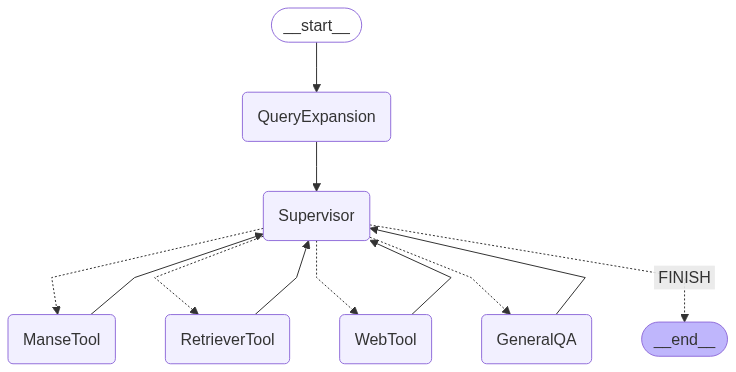

In [54]:
graph

In [55]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="1995년 3월 28일 남자, 12시 30분 출생 운세봐줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you provide a fortune reading for a male born on March 28, 1995, at 12:30 PM? I am interested in a detailed analysis of his Four Pillars of Destiny (Ba Zi) and how they may influence his personality, career prospects, and overall life path. Please include insights based on his birth chart analysis and any significant elements or interactions present in his chart.1995년 3월 28일 남자, 12시 30분 출생 운세봐줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"ManseTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
=== 사주팔자 ===
년주(年柱): 을해
월주(月柱): 기묘
일주(日柱): 무오
시주(時柱): 무오
일간(日干): 무

=== 오행 강약 ===
목: 39점
화: 20점
토: 68점
금: 0점
수: 10점

=== 십신 분석 ===
년주: 천간:정관, 지지:편재(70%), 지지:편관(30%)
월주: 천간:겁재, 지지:정관(100%)
일주: 지지:정인(70%), 지지:겁재(30%)
시주: 지지:정인(70%), 지지:겁재(30%)

=== 대운 (정밀 계산) ===
5세: 무인 (2000년 ~ 2009년)
15세: 정

In [56]:
# 추가질문 -> 바로 retriever tool로 들어갔다

In [57]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="대운과 세운분석 자세히 해줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you provide a detailed analysis of the Major Luck Cycle (Daewoon) and the Annual Luck Cycle (Seewoon) in relation to my Four Pillars of Destiny (Ba Zi)? I am particularly interested in understanding how these cycles influence my life path and fortune based on my birth chart.대운과 세운분석 자세히 해줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"RetrieverTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 대운(大運)과 세운(歲運) 분석을 자세히 진행하겠습니다.

---

## 1. 대운(大運) 분석

### 대운 시작 나이 및 방향

- 출생 월(3월)은 양력 기준으로 춘분(3월 20~21일) 이후이므로, 남성은 **대운을 순행(앞으로 진행)**합니다.
- 대운 시작 나이는 보통 출생 후 5세부터 시작합니다.

### 대운 10년 주기 및 내용

| 대운 시작 나이 | 대운  | 오행 및 해석                          |
|----------------|--------|-------------------------------------|
| 5세 ~ 14세     | 무인(戊寅) | 토(木)와 목(木) 기운, 성장기 기반 형성 |
| 15세 ~ 24세    | 정축(丁丑) | 화(火)와 토(土) 기운, 학업과 사회성 강화 |
| 25

In [58]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="난 미래에 대한 대운과 세운분석이 궁금해"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
I am curious about the analysis of my luck cycles (Da Yun) and annual luck (Se Yun) in relation to my Four Pillars of Destiny (Ba Zi). Could you provide insights into how these cycles will influence my future based on my birth chart?난 미래에 대한 대운과 세운분석이 궁금해
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"RetrieverTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 미래 대운과 세운(연운) 분석을 자세히 안내해 드리겠습니다.

---

## 1. 미래 대운(大運) 분석

### 대운 진행 방향 및 시작 나이

- 출생 월이 3월(춘분 이후)이므로, 남성은 대운을 **순행(앞으로 진행)**합니다.
- 대운은 5세부터 시작하며, 10년 단위로 바뀝니다.

### 미래 대운 목록 (35세 이후부터)

| 대운 시작 나이 | 대운  | 오행 및 해석                          |
|----------------|--------|-------------------------------------|
| 35세 ~ 44세    | 을해(乙亥) | 목(木)과 수(水) 기운, 확장과 성장, 인간관계 활발 |
| 45세 ~ 54세    | 갑술(甲戌) | 목(木)과 토(土) 기운, 안정과 책임감 강화, 사업 및 가정에 좋은 시기 |
| 55세 ~ 64세    | 계유(癸酉) | 수(水)

In [59]:
# Enhanced Retriever with Query Expansion 테스트
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 2})

# 한글 사주 질문으로 테스트 (Query Expansion이 작동할 질문)
inputs = {
    "messages": [
        HumanMessage(
            content="정관이 뭐야? 상세히 설명해줘"
        )
    ],
}


# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
What is the concept of "正官" (Zheng Guan) in the context of the Four Pillars of Destiny (Ba Zi)? Please provide a detailed explanation, including its significance in a birth chart analysis and how it influences an individual's personality, career, and relationships.정관이 뭐야? 상세히 설명해줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"WebTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
"정관"이라는 단어는 여러 분야에서 다르게 사용될 수 있는데, 어떤 맥락에서 "정관"을 물어보시는지에 따라 의미가 달라집니다. 대표적으로 다음과 같은 의미가 있습니다.

1. 법률 및 기업 분야에서의 정관:
- 회사나 단체의 조직, 운영, 목적, 권한, 의무 등을 규정한 기본 규칙이나 규약을 말합니다.
- 회사 정관은 회사 설립 시 작성하며, 회사의 조직 구조, 주주 권리, 이사회 구성, 의사결정 절차 등을 상세히 명시합니다.
- 정관은 회사 운영의 근간이 되며, 법적 효력을 가집니다.
- 예를 들어, 주식회사의 정관에는 회사명, 목적, 본점 소재지, 자본금, 주식의 종류와 수, 이사 및 감사의 임기 등이 포함됩니다.

2. 사주명리학에서의 정관:
- 사주(四柱) 명리학에서 "정관"은 십신(十神) 중 하나로, 본인의 일간(日干)을 기준으로 하는 특정한 오행 관계를 나타냅니다.
- 정관은 일간의 정(正)관계에 있는 관성(官星)으로, 주로 규율, 권위, 법

In [60]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, invoke_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="사주의 개념에 대해서 알려줘"
        )
    ],
}

# 그래프 실행
invoke_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message =================================

사주의 개념에 대해서 알려줘

🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
next:
WebTool

🔄 Node: agent in [WebTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================

사주(四柱)는 동아시아 전통 점술과 운명학에서 사용하는 개념으로, 한 사람의 태어난 연도, 월, 일, 시를 기준으로 하여 네 개의 기둥(연주, 월주, 일주, 시주)으로 나누어 그 사람의 운명과 성격, 인생의 흐름을 해석하는 방법입니다.

각 기둥은 천간(10간)과 지지(12지)로 구성되어 있으며, 이를 통해 오행(목, 화, 토, 금, 수)의 조화와 상생, 상극 관계를 분석합니다. 사주는 개인의 타고난 기질, 건강, 직업, 인간관계, 운세 변화 등을 예측하는 데 사용됩니다.

요약하면,
- 사주는 태어난 연, 월, 일, 시의 천간과 지지로 구성된 네 기둥을 의미
- 각 기둥은 오행과 음양의 조합으로 이루어짐
- 이를 통해 개인의 운명과 성격, 인생의 흐름을 해석함

더 구체적인 내용이나 궁금한 점이 있으면 알려주세요!

🔄 Node: WebTool 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message =================================
Name: WebTool

사주(

In [62]:
# GeneralQA 도구 테스트 - 일반 질문
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 2})

# 일반 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="파이썬에서 딕셔너리와 리스트의 차이점을 알려주세요"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)



🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you explain the differences between a dictionary and a list in Python, particularly in the context of data structures used for analyzing a birth chart in Four Pillars of Destiny (Ba Zi)? I'm interested in understanding how these data structures can be utilized to organize and manipulate information related to the elements and interactions in a person's birth chart analysis.파이썬에서 딕셔너리와 리스트의 차이점을 알려주세요
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"GeneralQA"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
## 파이썬 딕셔너리와 리스트의 차이점

파이썬에서 딕셔너리(Dictionary)와 리스트(List)는 모두 데이터를 저장하는 데 사용되는 자료구조이지만, 데이터를 구성하고 접근하는 방식에서 뚜렷한 차이를 보입니다.

**1. 저장 방식:**

*   **리스트:** 리스트는 순서가 있는 요소들의 **나열**입니다. 각 요소는 **인덱스**를 통해 접근하며, 인덱스는 0부터 시작하는 정수입니다. 요소들은 메모리 상에 연속적으로 저장되는 경향이 있습니다.
*   **딕셔너리:** 딕셔너리는 **키(Key)와